In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

In [7]:
df = pd.read_csv(r"/Users/admin/Desktop/optimization-1/parklane_combined_edited.csv")
print('Unfiltered row of dataframe is {}'.format(len(df)))

Unfiltered row of dataframe is 727657


total number of rows after filter is 176037


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

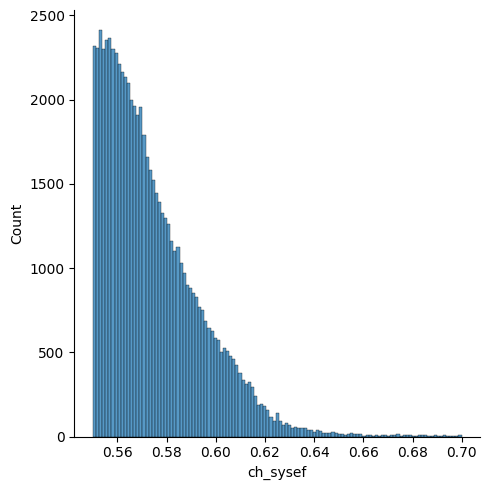

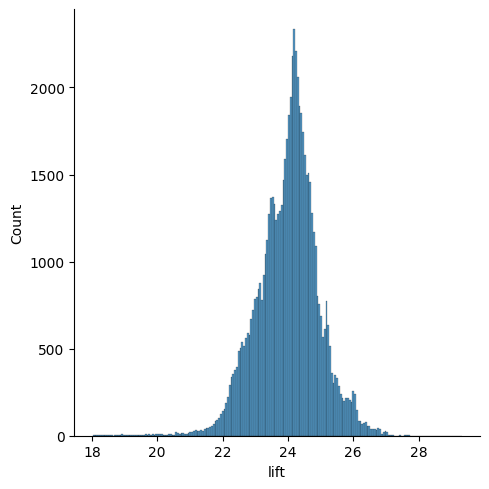

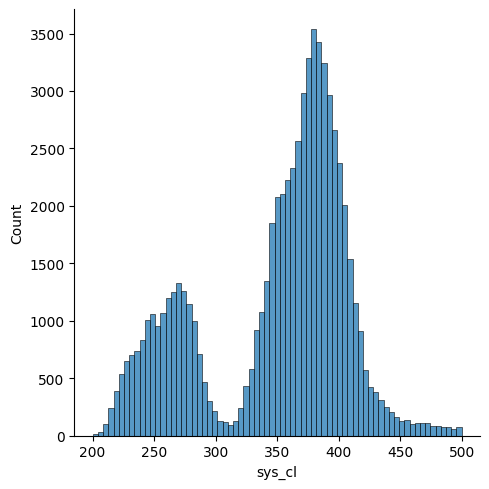

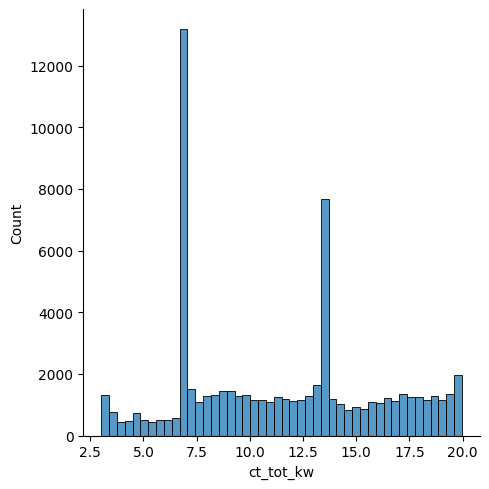

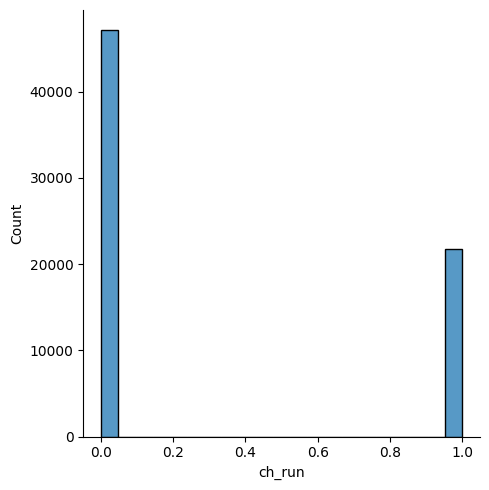

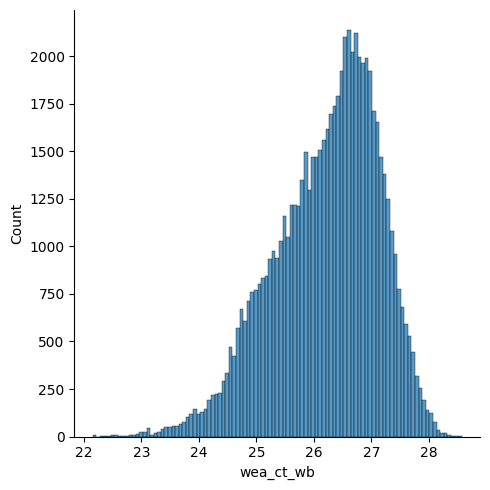

In [11]:
# filter where hr or hb is  not 0
df = df[(df['sys_hr'] != 0) | (df['sys_hb'] != 0)]
df = df[(df['h_chwst'] >=5) & (df['h_chwst'] <=20)]
df = df[(df['h_chwrt'] >=5) & (df['h_chwrt'] <=25)]
df = df[(df['pchwp_1_kw'] >=1.2) & (df['pchwp_1_kw'] <=5)]
# unsure of pchwp_2 kw filtering
#df = df[(df['pchwp_2_kw'] >=1.2) & (df['pchwp_2_kw'] <=5)]
df = df[(df['h_chwf'] >= 0) & (df['h_chwf'] <= 1500)]
df = df[(df['cwp_1_kw'] > 0) & (df['cwp_1_kw'] <=25)]
df = df[(df['cwp_2_kw'] > 0) & (df['cwp_2_kw'] <=25)]
df = df[(df['h_chwf'] >0) & (df['h_chwf'] <=1500)]
df = df[(df['h_cwst']>=20) & (df['h_cwst']<=32)]
df = df[(df['h_cwrt']>=20) & (df['h_cwrt']<=40)]
df = df[(df['ch_1_kwe']>=0) & (df['ch_1_kwe']<=350)]
df = df[(df['ch_2_kwe']>=0) & (df['ch_2_kwe']<=350)]
df = df[(df['ct_1_kw']>=0) & (df['ct_1_kw']<=15)]
df = df[(df['ct_2_kw']>=0) & (df['ct_2_kw']<=15)]
df = df[(df['sys_cl']>=200) & (df['sys_cl']<=500)]
df = df[(df['sys_hr']>0) & (df['sys_hr']<=1000)]
df = df[(df['sys_kw']>0) & (df['sys_kw']<=400)]
fil_df = df[(df['ch_sysef']>=0.4) & (df['ch_sysef']<=0.7) & (df['sys_eff']>=0.4) & (df['sys_eff']<=0.9)]

# replace NaN values with 0? median imputation
fil_df = fil_df.fillna(0)

# efficiency column reduce by air system efficiency
fil_df['sys_eff'] = fil_df['sys_eff'] - fil_df['air_eff']

# creating Lift Column, Lift: [h_cwrt-h_chwst]
fil_df['lift'] = fil_df['h_cwrt'] - fil_df['h_chwst']
fil_df = fil_df[(fil_df['lift']>=18) & (fil_df['lift']<=30)]

# chiller configuration
fil_df['ch_run'] = (fil_df['ch_1_kwe']>=2) & (fil_df['ch_2_kwe']>=2)
fil_df['ch_run'] = fil_df['ch_run'].astype(int)

# ct approach
fil_df['ct_approach'] = fil_df['h_cwst'] - fil_df['wea_ct_wb']
fil_df = fil_df[fil_df['ct_approach']<=4]

# ct_tot_kw
fil_df['ct_tot_kw'] = fil_df['ct_1_kw'] + fil_df['ct_2_kw']
fil_df = fil_df[(fil_df['ct_tot_kw']>=2) & (fil_df['ct_tot_kw']<=20)]

print("total number of rows after filter is {}".format(len(fil_df)))

# filtering ch_sysef above 0.55

# selecting related features only
ch_sysef_df = fil_df[['ch_sysef', 'lift', 'sys_cl', 'ct_tot_kw', 'ch_run', 'wea_ct_wb']]
ch_sysef_df = ch_sysef_df[ch_sysef_df['ch_sysef']>0.55]
# reset
ch_sysef_df = ch_sysef_df.reset_index()

# distribution
sns.displot(ch_sysef_df, x="ch_sysef")
sns.displot(ch_sysef_df, x="lift")
sns.displot(ch_sysef_df, x="sys_cl")
sns.displot(ch_sysef_df, x="ct_tot_kw")
sns.displot(ch_sysef_df, x="ch_run")
sns.displot(ch_sysef_df, x="wea_ct_wb")

In [9]:
test = ch_sysef_df[(ch_sysef_df['lift']<=23) & (ch_sysef_df['lift']>=22)]
test.head(55)

,index,ch_sysef,lift,sys_cl,ct_tot_kw,ch_run,wea_ct_wb
5,653,0.594042,22.279536,376.924744,7.088000,0,25.350506
6,654,0.591066,22.793373,376.842010,7.088000,0,25.318680
18,753,0.561603,22.021781,236.996429,7.088001,0,25.252619
20,762,0.563797,22.170433,231.700974,7.040001,0,25.582020
21,784,0.559215,22.196042,241.129181,7.008000,0,25.804775
22,787,0.554241,22.286970,236.868256,7.040000,0,25.879368
23,796,0.558277,22.566754,234.248199,7.104000,0,25.900612
24,803,0.562477,22.668913,242.422440,7.040000,0,25.719774
25,812,0.557059,22.816611,237.702927,7.008000,0,26.019506
26,827,0.572243,22.830382,232.830139,7.056000,0,25.844986


In [10]:
import pickle

model = pickle.load(open('/Users/admin/Desktop/optimization/parklane/RF_wb_both_ch.sav', 'rb'))
res = []
wb = [i/10 for i in range(220, 260)]
for i in wb:
    res.append(model.predict([[23.39, 350, 14, 1, i]]))
plt.xlabel('wb')
plt.ylabel('chsyseff')
plt.scatter(wb, res)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/admin/Desktop/optimization/parklane/RF_wb_both_ch.sav'

In [ ]:
x = np.array(test['ct_tot_kw'])
y = np.array(test['wea_ct_wb'])
z = np.array(test['ch_sysef'])

In [ ]:
print(X, Y)

[[7.056    7.088001 7.104001 ... 4.32     4.192    4.096   ]
 [7.056    7.088001 7.104001 ... 4.32     4.192    4.096   ]
 [7.056    7.088001 7.104001 ... 4.32     4.192    4.096   ]
 ...
 [7.056    7.088001 7.104001 ... 4.32     4.192    4.096   ]
 [7.056    7.088001 7.104001 ... 4.32     4.192    4.096   ]
 [7.056    7.088001 7.104001 ... 4.32     4.192    4.096   ]] [[25.20377  25.20377  25.20377  ... 25.20377  25.20377  25.20377 ]
 [25.467121 25.467121 25.467121 ... 25.467121 25.467121 25.467121]
 [25.484127 25.484127 25.484127 ... 25.484127 25.484127 25.484127]
 ...
 [25.471598 25.471598 25.471598 ... 25.471598 25.471598 25.471598]
 [25.491112 25.491112 25.491112 ... 25.491112 25.491112 25.491112]
 [25.503004 25.503004 25.503004 ... 25.503004 25.503004 25.503004]]


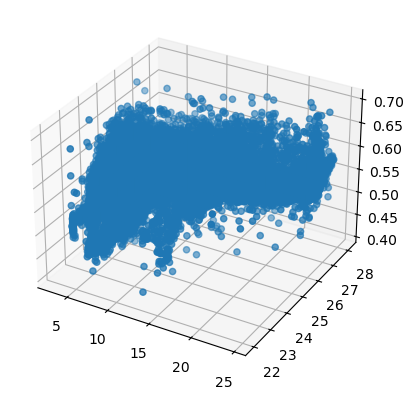

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z)

40 40


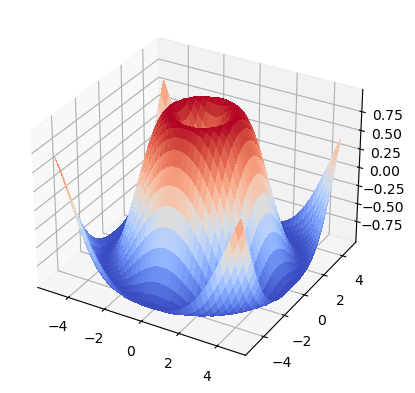

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
print(len(R[0]), len(Z[0]))
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


In [ ]:
a = np.linspace(-5, 5, 100)
b = np.linspace(-5, 5, 100)
A, B = np.meshgrid(a, b)
C = np.sin(np.sqrt(A**2 + B**2))
print(len(C[0]))

100
